In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import os
import glob
import pandas as pd
import re
import math

In [2]:
import glob
files=glob.glob("*.txt")

In [3]:
files

['DatosAbiertos201909.txt',
 'DatosAbiertos201910.txt',
 'DatosAbiertos201911.txt',
 'DatosAbiertos201912.txt',
 'DatosAbiertos202001.txt',
 'DatosAbiertos202002.txt',
 'DatosAbiertos202003.txt',
 'DatosAbiertos202004.txt',
 'DatosAbiertos202005.txt',
 'DatosAbiertos202006.txt',
 'DatosAbiertos202007.txt',
 'DatosAbiertos202008.txt',
 'DatosAbiertos202009.txt',
 'DatosAbiertos202010.txt',
 'DatosAbiertos202011.txt',
 'DatosAbiertos202012.txt']

In [4]:
data1=pd.read_csv(files[0],usecols=[0,1,2,3,9])
data1

,ENTIDAD,DISTRITO,MUNICIPIO,SECCION,LISTA
0,1,0,0,0,3023
1,1,1,2,338,1760
2,1,1,2,339,1699
3,1,1,2,340,1726
4,1,1,2,341,2010
...,...,...,...,...,...
68423,32,4,57,530,1656
68424,32,4,57,531,1579
68425,32,4,57,532,1069
68426,32,4,57,533,1168


In [5]:
data1_GTO=data1[data1['ENTIDAD']==11]

In [6]:
data1_GTO['LISTA'].describe()

count     3142.000000
mean      1412.301719
std       1408.265179
min         69.000000
25%        778.250000
50%       1095.500000
75%       1543.750000
max      27950.000000
Name: LISTA, dtype: float64

In [7]:
mpos=np.unique(data1_GTO['MUNICIPIO'])
mpos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46], dtype=int64)

In [8]:
ln_mpo=[]
for mpo in mpos[1:]:
    ln_mpo.append(data1_GTO[data1_GTO['MUNICIPIO']==mpo]['LISTA'].sum())

pd.DataFrame({'MPO':mpos[1:],'LISTA_NAL_MPO_20200531':ln_mpo})

,MPO,LISTA_NAL_MPO_20200531
0,1,67427
1,2,94040
2,3,128446
3,4,49656
4,5,67868
5,6,4207
6,7,378361
7,8,31431
8,9,60267
9,10,9283


In [9]:
data1_GTO.groupby(['MUNICIPIO'])['LISTA'].sum()

MUNICIPIO
0       27950
1       67427
2       94040
3      128446
4       49656
5       67868
6        4207
7      378361
8       31431
9       60267
10       9283
11      74256
12      23212
13      18343
14     113311
15     139096
16      16845
17     422390
18      28858
19      40842
20    1133923
21      43380
22      18031
23     124650
24      10761
25      54907
26      45974
27     212781
28      83494
29      27934
30      82003
31      92714
32      60509
33      90167
34       4433
35      60975
36       6493
37     137162
38      10198
39      31068
40      13314
41      48972
42     114362
43      15382
44      46497
45       8527
46      62752
Name: LISTA, dtype: int64

In [10]:
LISTA_NAL_MPO=data1_GTO[1:].groupby(['MUNICIPIO']).sum()['LISTA']
LISTA_NAL_MPOs=pd.DataFrame(LISTA_NAL_MPO)

In [11]:
LISTA_NAL_MPOs['LISTA_NAL2']=LISTA_NAL_MPOs['LISTA']*2
LISTA_NAL_MPOs

,LISTA,LISTA_NAL2
MUNICIPIO,,
1,67427,134854
2,94040,188080
3,128446,256892
4,49656,99312
5,67868,135736
6,4207,8414
7,378361,756722
8,31431,62862
9,60267,120534


In [12]:
files

['DatosAbiertos201909.txt',
 'DatosAbiertos201910.txt',
 'DatosAbiertos201911.txt',
 'DatosAbiertos201912.txt',
 'DatosAbiertos202001.txt',
 'DatosAbiertos202002.txt',
 'DatosAbiertos202003.txt',
 'DatosAbiertos202004.txt',
 'DatosAbiertos202005.txt',
 'DatosAbiertos202006.txt',
 'DatosAbiertos202007.txt',
 'DatosAbiertos202008.txt',
 'DatosAbiertos202009.txt',
 'DatosAbiertos202010.txt',
 'DatosAbiertos202011.txt',
 'DatosAbiertos202012.txt']

In [13]:
date=[]
date_=[]
files_=[]
for i,file in enumerate(files):
    date.append(re.findall(r'\d+',file)[0])
    
temp=sorted(range(len(date)), key=date.__getitem__)

for i in temp:
    date_.append(date[i])
    print(date[i],files[i])
    files_.append(files[i])

201909 DatosAbiertos201909.txt
201910 DatosAbiertos201910.txt
201911 DatosAbiertos201911.txt
201912 DatosAbiertos201912.txt
202001 DatosAbiertos202001.txt
202002 DatosAbiertos202002.txt
202003 DatosAbiertos202003.txt
202004 DatosAbiertos202004.txt
202005 DatosAbiertos202005.txt
202006 DatosAbiertos202006.txt
202007 DatosAbiertos202007.txt
202008 DatosAbiertos202008.txt
202009 DatosAbiertos202009.txt
202010 DatosAbiertos202010.txt
202011 DatosAbiertos202011.txt
202012 DatosAbiertos202012.txt


In [14]:
for i,file in enumerate(files_):
    data=pd.read_csv(file)
    data=data[1:]
    data=data[data['ENTIDAD']==11][1:]
    mpo=data.groupby(['MUNICIPIO']).sum()
    if i==0 :
        if 'LISTA_NAL' in mpo.columns:
            df_mpo=pd.DataFrame(mpo['LISTA_NAL'])
        if 'LISTA_NACIONAL' in mpo.columns:
            df_mpo=pd.DataFrame(mpo['LISTA_NACIONAL'])
        if 'LISTA' in mpo.columns:
            df_mpo=pd.DataFrame(mpo['LISTA'])
    else:
        if 'LISTA_NAL' in mpo.columns:
            df_mpo[date_[i]]=mpo['LISTA_NAL']
        if 'LISTA_NACIONAL' in mpo.columns:
            df_mpo[date_[i]]=mpo['LISTA_NACIONAL']
        if 'LISTA' in mpo.columns:
            df_mpo[date_[i]]=mpo['LISTA']

C:\Users\saulg\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


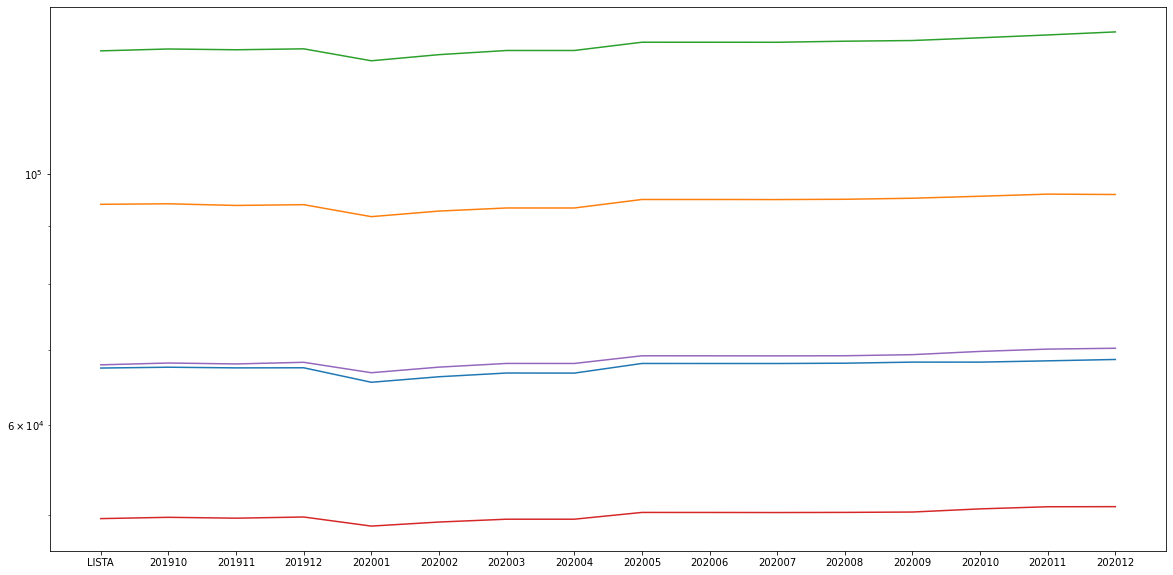

In [15]:
plt.figure(figsize=(20,10))
for i in range (5):
    plt.plot(df_mpo.iloc[i])
    plt.yscale('log')

In [16]:
df_mpo

,LISTA,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012
MUNICIPIO,,,,,,,,,,,,,,,,
1,67427,67541,67450,67463,65505,66245,66750,66736.0,68057,68054,68052,68093,68244,68241,68422,68611
2,94040,94139,93825,93970,91712,92759,93343,93340.0,94967,94967,94952,95009,95209,95595,96005,95934
3,128446,128937,128731,128978,125884,127461,128544,128543.0,130720,130717,130708,130992,131172,131903,132669,133489
4,49656,49787,49699,49818,48907,49311,49596,49596.0,50283,50281,50273,50287,50324,50647,50867,50877
5,67868,68120,67992,68218,66789,67553,68063,68058.0,69125,69124,69114,69132,69287,69745,70072,70194
6,4207,4228,4203,4200,4145,4162,4212,4212.0,4244,4244,4244,4249,4253,4245,4262,4261
7,378361,379387,378139,378402,370594,374915,378228,378153.0,383007,383002,382980,383071,383484,385535,386714,387848
8,31431,31546,31501,31455,30822,31080,31406,31385.0,31800,31799,31797,31818,31816,32043,32435,32565
9,60267,60366,60337,60325,58753,59504,59917,59910.0,60931,60931,60929,60987,61077,61486,61679,61915


In [17]:
municipios=np.asarray(df_mpo)

In [18]:
municipios[0]

array([67427., 67541., 67450., 67463., 65505., 66245., 66750., 66736.,
       68057., 68054., 68052., 68093., 68244., 68241., 68422., 68611.])

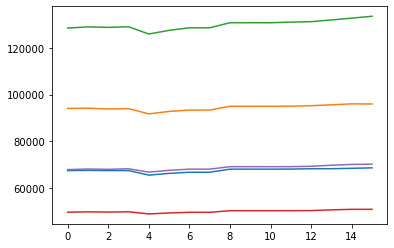

In [19]:
for i in range(5):
    plt.plot(municipios[i])

In [20]:
fits=[]
prediction_lnal=[]
for i in range(len(municipios)):
    xx=np.arange(len(municipios[i]))
    ma,ba=np.polyfit(xx,municipios[i], 1,w=municipios[i])
    fits.append([ma,ba])
    pred=ma*(xx[-2]+12)+ba
    if pred<municipios[i][-1]:
        pred=municipios[i][-1]
        
    prediction_lnal.append(pred)

In [21]:
fits

[[112.73816336252618, 66722.54348153612],
 [181.51913872648962, 93012.03341624055],
 [352.79463281352, 127239.72635855831],
 [94.9861311519409, 49304.58182052976],
 [173.156873571812, 67361.20376624783],
 [5.057901289943941, 4185.5137388086005],
 [750.976062196247, 375143.8498583578],
 [73.8313655922297, 31119.44537608695],
 [129.25157229042247, 59622.05558276558],
 [11.19469181165771, 9249.455324338502],
 [128.77953471001013, 73804.77820253416],
 [43.44527346235568, 23102.369276724097],
 [37.9300717722141, 18155.04822281339],
 [241.94402937368167, 112662.92645339236],
 [326.502214387321, 138006.8266099071],
 [13.498053456869789, 16743.626906086924],
 [974.0084931674648, 419007.36839943426],
 [60.513317011095374, 28671.4107728591],
 [71.23934697877965, 40526.689917464646],
 [2784.041327698441, 1126359.4902672914],
 [81.46219649976082, 43032.57732838648],
 [37.35583986410907, 17896.352557060807],
 [290.3984757950512, 122836.38418861227],
 [14.601701274736662, 10688.868125788575],
 [159.

In [22]:
df_mpo['Predicción LNAL']=prediction_lnal

In [23]:
df_mpo

,LISTA,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,Predicción LNAL
MUNICIPIO,,,,,,,,,,,,,,,,,
1,67427,67541,67450,67463,65505,66245,66750,66736.0,68057,68054,68052,68093,68244,68241,68422,68611,6.965374e+04
2,94040,94139,93825,93970,91712,92759,93343,93340.0,94967,94967,94952,95009,95209,95595,96005,95934,9.773153e+04
3,128446,128937,128731,128978,125884,127461,128544,128543.0,130720,130717,130708,130992,131172,131903,132669,133489,1.364124e+05
4,49656,49787,49699,49818,48907,49311,49596,49596.0,50283,50281,50273,50287,50324,50647,50867,50877,5.177422e+04
5,67868,68120,67992,68218,66789,67553,68063,68058.0,69125,69124,69114,69132,69287,69745,70072,70194,7.186328e+04
6,4207,4228,4203,4200,4145,4162,4212,4212.0,4244,4244,4244,4249,4253,4245,4262,4261,4.317019e+03
7,378361,379387,378139,378402,370594,374915,378228,378153.0,383007,383002,382980,383071,383484,385535,386714,387848,3.946692e+05
8,31431,31546,31501,31455,30822,31080,31406,31385.0,31800,31799,31797,31818,31816,32043,32435,32565,3.303906e+04
9,60267,60366,60337,60325,58753,59504,59917,59910.0,60931,60931,60929,60987,61077,61486,61679,61915,6.298260e+04


In [24]:
df_mpo['Predicción Casillas']=df_mpo['Predicción LNAL']/750
df_mpo

,LISTA,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,Predicción LNAL,Predicción Casillas
MUNICIPIO,,,,,,,,,,,,,,,,,,
1,67427,67541,67450,67463,65505,66245,66750,66736.0,68057,68054,68052,68093,68244,68241,68422,68611,6.965374e+04,92.871648
2,94040,94139,93825,93970,91712,92759,93343,93340.0,94967,94967,94952,95009,95209,95595,96005,95934,9.773153e+04,130.308708
3,128446,128937,128731,128978,125884,127461,128544,128543.0,130720,130717,130708,130992,131172,131903,132669,133489,1.364124e+05,181.883182
4,49656,49787,49699,49818,48907,49311,49596,49596.0,50283,50281,50273,50287,50324,50647,50867,50877,5.177422e+04,69.032295
5,67868,68120,67992,68218,66789,67553,68063,68058.0,69125,69124,69114,69132,69287,69745,70072,70194,7.186328e+04,95.817710
6,4207,4228,4203,4200,4145,4162,4212,4212.0,4244,4244,4244,4249,4253,4245,4262,4261,4.317019e+03,5.756026
7,378361,379387,378139,378402,370594,374915,378228,378153.0,383007,383002,382980,383071,383484,385535,386714,387848,3.946692e+05,526.225637
8,31431,31546,31501,31455,30822,31080,31406,31385.0,31800,31799,31797,31818,31816,32043,32435,32565,3.303906e+04,44.052081
9,60267,60366,60337,60325,58753,59504,59917,59910.0,60931,60931,60929,60987,61077,61486,61679,61915,6.298260e+04,83.976795


In [25]:
math.ceil(df_mpo['Predicción Casillas'].sum())

6168